# MULTIDIMENSIONAL KALMAN FILTER

## 1. Introduction

### 1.1 Vehicle location estimation

The aim of this notebook is to estimate the location of a vehicle in the XY plane using multidimensional Kalman filter. This is an implementation of a simple exampl proposed in an educational webpage.

It is suppose that the vehicle has an onboard location sensor that reports X and Y coordinates of the system, this represents the observations with wich are corrected the projections.

It is assumed a constant acceleration dynamics. 

<img alt="carro" src="carro.JPG">

The state of the system is given by the position, velocity and acceleration of the car in the X and Y coordinates. The state extrapolated vehicle for time n+1 can be describe by the following system of equations:

\begin{equation}
\begin{split}
\hat{x}_{n+1,n}=\hat{x}_{n,n}+\hat{\dot{x}}_{n,n}\Delta t+\frac{1}{2}\hat{\ddot{x}}_{n,n}\Delta t^2 \\
\hat{\dot{x}}_{n+1,n} = \hat{\dot{x}}_{n,n}+ \hat{\ddot{x}}_{n,n}\Delta t \\
\hat{\ddot{x}}_{n+1,n} = \hat{\ddot{x}}_{n,n} \\
\hat{y}_{n+1,n}=\hat{y}_{n,n}+\hat{\dot{y}}_{n,n}\Delta t+\frac{1}{2}\hat{\ddot{y}}_{n,n}\Delta t^2 \\
\hat{\dot{y}}_{n+1,n} = \hat{\dot{y}}_{n,n}+ \hat{\ddot{y}}_{n,n}\Delta t \\
\hat{\ddot{y}}_{n+1,n} = \hat{\ddot{y}}_{n,n} \\
\end{split}
\end{equation}


## 2. Extended Kalman filter equations

The Kalman filter equations are given by:

\begin{equation}
 \left.\begin{aligned}
        \hat{x}_{n+1,n}= F\hat{x}_{n,n}\\
         P_{n+1,n}= FP_{n,n}F^T+Q
       \end{aligned}
 \right\}
 \qquad \text{Prediction equations}
\end{equation}

where $F$ is the state transition matrix (comes from the dynamic model), $x$ is the state vector (what we want to predict), $Q$ is the process noise uncertainty and $P$ is the estimate uncertainty (covariance matrix).

\begin{equation}
 \left.\begin{aligned}
        \hat{x}_{n,n}= \hat{x}_{n,n-1} + K_n(z_n- H\hat{x}_{n,n-1}\\
         P_{n,n}= (I-K_nH)P_{n,n-1}(I-K_nH)^T+ K_n R_n K_n^T\\
         K_{n}= P_{n,n-1}H^T(HP_{n,n-1}H^T+R_n)^{-1}
       \end{aligned}
 \right\}
 \qquad \text{Update (correction with observations)}
\end{equation}

where $I$ is the indentity matrix, $K_n$ is the Kalman Gain, $P_{n,n}$ is the covariance update, $\hat{x}_{n,n}$ is the state update, $z_n$ is the measurement equation that comes from the observations, $H$ is the observation matrix, that is a linear operator that allows to consider only the variables that are observed, and $R_n$ is the measurement uncertainty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

The first step is to create the Kalman Filter arrays:

In [2]:
# Creation of Kalman's filter arrays
Xn = np.zeros([6,1])
F = np.identity(6)
Pn = np.zeros([6,6])
Q = np.zeros([6,6])
Kn = np.zeros([6,2])
H = np.zeros([2,6])
Rn = np.zeros([2,2])
dt = 1
# Variance of the process, "random acceleration":
var_a = 0.15**2
# Observation or measurement variance:
var_mxy = 3**2

#Observation matrix zn
Zn = np.zeros([2,1])
'observations'
x_o = np.array([-393.66,-375.93,-351.04,-328.96,-299.35,-273.36,-245.89,-222.58,-198.03,-174.17,-146.32,-123.72,-103.47,-78.23,-52.63,-23.34,25.96,49.72,76.94,95.38,119.83,144.01,161.84,180.56,201.42,222.62,	239.4,252.51,266.26,271.75,277.4,294.12,301.23,291.8,299.89,0])
y_o = np.array([300.4,301.78,295.1,305.19,301.06,302.05,300,303.57,296.33,297.65,297.41,299.61,299.6,302.39,295.04,300.09,294.72,298.61,294.64,284.88,272.82,264.93,251.46,241.27,222.98,203.73,184.1,166.12,138.71,119.71,100.41,79.76,50.62,32.99,2.14,0])
Z_o = np.zeros([2,36])
Z_o[0,:] = x_o
Z_o[1,:] = y_o

For the numerical application is assume that a vehicle is moving in a straight line in the X direction with a constant velocity. After traveling 400 meters the vehicle turns right, with a turning radius of 300 meters. During the turning maneuver, the vehicle experiences acceleration due to the circular motion (an angular acceleration). 

Text(0, 0.5, 'Y')

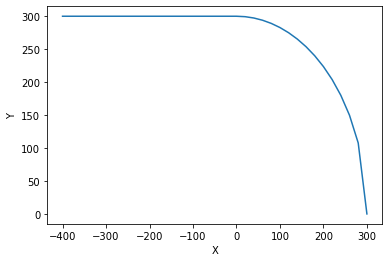

In [3]:
#Model 
x_m = np.array([-400,-300,-200,-100,0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
y_m = np.array([300,300,300,300,300,299.3325909,297.3213749,293.9387691,289.1366459,282.8427125,274.9545417,265.3299832,253.7715508,240,223.6067977,203.9607805,180,149.6662955,107.7032961,0])
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_m,y_m)
plt.xlabel('X')
plt.ylabel('Y')

Now are set the arrays according with the conditions of the problem

In [4]:
# Observation matrix, it is ajusted according with the premise that we only have observations of the position of the vehicle with the sensors
H[0,0] = 1
H[1,3] = 1
print(H)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [5]:
#State transition matrix, this comes from the system of equations that describe the extraoplate state describe in section 1.
F[0,1] = dt
F[0,2] = 0.5*dt**2
F[1,2] = dt
F[3,4] = dt
F[3,5] = 0.5*dt**2
F[4,5] = dt
print(F)

[[1.  1.  0.5 0.  0.  0. ]
 [0.  1.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  1.  1.  0.5]
 [0.  0.  0.  0.  1.  1. ]
 [0.  0.  0.  0.  0.  1. ]]


In [6]:
#Process noise matrix, it is assume that the process noise X and Y are not correlated so the covariance values are zero.
Q[0,0] = var_a*(dt**4)/4
Q[0,1] = var_a*(dt**3)/2
Q[0,2] = var_a*(dt**2)/2
Q[1,0] = var_a*(dt**3)/2
Q[1,1] = var_a*(dt**2)
Q[1,2] = var_a*dt
Q[2,0] = var_a*(dt**2)/2
Q[2,1] = var_a*dt
Q[2,2] = var_a*1
Q[3,3] = var_a*(dt**4)/4
Q[3,4] = var_a*(dt**3)/2
Q[3,5] = var_a*(dt**2)/2
Q[4,3] = var_a*(dt**3)/2
Q[4,4] = var_a*(dt**2)
Q[4,5] = var_a*dt
Q[5,3] = var_a*(dt**2)/2
Q[5,4] = var_a*dt
Q[5,5] = var_a*1

print(Q)

[[0.005625 0.01125  0.01125  0.       0.       0.      ]
 [0.01125  0.0225   0.0225   0.       0.       0.      ]
 [0.01125  0.0225   0.0225   0.       0.       0.      ]
 [0.       0.       0.       0.005625 0.01125  0.01125 ]
 [0.       0.       0.       0.01125  0.0225   0.0225  ]
 [0.       0.       0.       0.01125  0.0225   0.0225  ]]


In [7]:
# Uncertainty of predictions, it is assume that x and y measurements are uncorrelated
Rn[0,0] = var_mxy
Rn[1,1] = var_mxy
print(Rn)

[[9. 0.]
 [0. 9.]]


In [8]:
# Initial conditions 
Xo = np.zeros([6,1])
Po = np.zeros([6,6]) + np.identity(6)*500
print('Initial state (assumption): \n',Xo)
print('\n Initial uncertainty (assumption): \n',Po)

Initial state (assumption): 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

 Initial uncertainty (assumption): 
 [[500.   0.   0.   0.   0.   0.]
 [  0. 500.   0.   0.   0.   0.]
 [  0.   0. 500.   0.   0.   0.]
 [  0.   0.   0. 500.   0.   0.]
 [  0.   0.   0.   0. 500.   0.]
 [  0.   0.   0.   0.   0. 500.]]


## 3. Implementation of Kalman filter

In [9]:
# Kalman filter

def Kalman (Xo,Po): 
    Xnn = Xo
    Pnn = Po
    X = np.zeros(len(x_o))
    Y = np.zeros(len(x_o))
    K = np.zeros(len(x_o))
    c = 0
    
    while c <= (len(x_o)-1):
    # Forecast
        Xnc = Xnn.copy()
        Xn1_n = F @ Xnc    
        Pnc = Pnn.copy()
        Pn1_n = F @ Pnc @ F.T + Q
    
    #Analysis
        I = np.identity(6)   
        Kn = (Pn1_n @ H.T) @ inv(H @ Pn1_n @ H.T + Rn)
        Xnn = Xn1_n + Kn @ ((Z_o[:,c][:,None]) - (H @ Xn1_n))
        Pnn = (I - Kn @ H) @ Pn1_n @ (I - Kn @ H).T + Kn @ Rn @ Kn.T
        
        X[c] = Xnn[0,0]
        Y[c] = Xnn[3,0]
        K[c] = Kn[0,0]
        #print(c)
        c += 1
        
    return Xn1_n, Pn1_n, Xnn, Pnn, X, Y, K

In [10]:
Xp, Pp, Xe,Pe, X, Y, K = Kalman(Xo,Po)
print('\n Final prediction: \n', Xp)
print('\n Final prediction uncertainty: \n',Pp)


 Final prediction: 
 [[298.68788773]
 [ -1.564776  ]
 [ -1.87689296]
 [-23.98936541]
 [-26.77505994]
 [ -0.73576821]]

 Final prediction uncertainty: 
 [[9.80298545 3.57106569 0.65043717 0.         0.         0.        ]
 [3.57106569 1.7508883  0.40087381 0.         0.         0.        ]
 [0.65043717 0.40087381 0.12353137 0.         0.         0.        ]
 [0.         0.         0.         9.80298545 3.57106569 0.65043717]
 [0.         0.         0.         3.57106569 1.7508883  0.40087381]
 [0.         0.         0.         0.65043717 0.40087381 0.12353137]]


In [11]:
print('\n Final corrected estimation: \n', Xe)
print('\n Final corrected uncertainty: \n',Pe)


 Final corrected estimation: 
 [[ 1.42966179e+02]
 [-5.82916224e+01]
 [-1.22091727e+01]
 [-1.14824473e+01]
 [-2.22189962e+01]
 [ 9.40774075e-02]]

 Final corrected uncertainty: 
 [[4.69217345 1.70928129 0.31133006 0.         0.         0.        ]
 [1.70928129 1.07267099 0.27734269 0.         0.         0.        ]
 [0.31133006 0.27734269 0.1010313  0.         0.         0.        ]
 [0.         0.         0.         4.69217345 1.70928129 0.31133006]
 [0.         0.         0.         1.70928129 1.07267099 0.27734269]
 [0.         0.         0.         0.31133006 0.27734269 0.1010313 ]]


According to this the final position of the vehicle in coordinates is X= 142.96 and Y = -11.48 with velocity in X and Y of -58.29 and -22.21 m/s respectively and a acceleration of -12.21 and 9.41 m/s^2 in X and Y respectively.

Finally is getting the plot comparing the theoretical values, the observations and the predictions corrected done by the Kalman filter

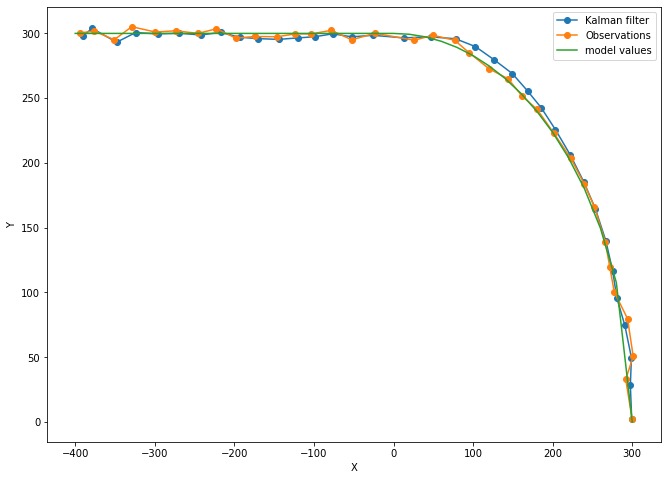

In [12]:
plt.figure(figsize=(11,8))
plt.plot(X[0:35],Y[0:35],'o-',label='Kalman filter')
plt.plot(x_o[0:35],y_o[0:35], 'o-', label='Observations')
plt.plot(x_m,y_m, label='model values')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

Text(0, 0.5, 'Kalman gain')

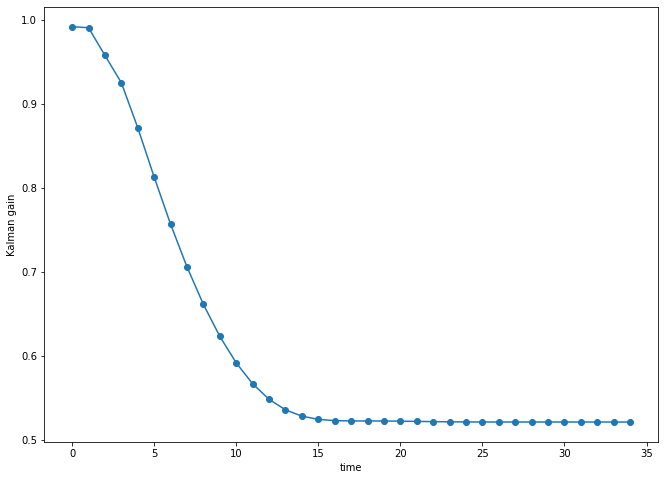

In [13]:
t = np.arange(0,35,1)
plt.figure(figsize=(11,8))
plt.plot(t[0:35],K[0:35],'o-')
plt.xlabel('time')
plt.ylabel('Kalman gain')

The Kalman filter estimate the position of the vehicle quite well, but when the vehicle is in the curvature zone the approximation is not too precise. This is due to one of the assumptions of the problem is that the acceleration is constant but is not because of the circular motion (angular acceleration).  It was observe that the results are improving varying (increasing) the value of the variance of the process, but as academical purpose is keeping the value proposed by the website in order to compare the correct implementation of the filter.

##  4. Bibliography

• Alex Becker (www.kalmanfilter.net). (2021). Online Kalman Filter Tutorial. KALMAN FILTER. Retrieved January 17, 2022, from https://www.kalmanfilter.net/multiExamples.html